In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df_0 = pd.read_csv("data.txt")
df= df_0.copy()
df.head()
df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [11]:
df.shape

(125972, 43)

In [5]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [8]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [10]:
data = pd.read_csv("attack.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [14]:
data[data.select_dtypes(include="category")]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.iloc[: ,0:20].isnull().mean()*100

duration              0.0
protocol_type         0.0
service               0.0
flag                  0.0
src_bytes             0.0
dst_bytes             0.0
land                  0.0
wrong_fragment        0.0
urgent                0.0
hot                   0.0
num_failed_logins     0.0
logged_in             0.0
num_compromised       0.0
root_shell            0.0
su_attempted          0.0
num_root              0.0
num_file_creations    0.0
num_shells            0.0
num_access_files      0.0
num_outbound_cmds     0.0
dtype: float64

In [19]:
data["attack"]

0          normal
1         neptune
2          normal
3          normal
4         neptune
           ...   
125967    neptune
125968     normal
125969     normal
125970    neptune
125971     normal
Name: attack, Length: 125972, dtype: object

In [28]:
# Encoder les colonnes catégorielles
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [29]:
target = data['attack'].values
target = target.reshape(-1, 1)
X1 = data.drop("attack",axis=1)

In [30]:
X1.shape

(125972, 42)

In [31]:
features = X1.columns

In [32]:
#Transformation en matrice
X = np.array(X1)
X[:5]

array([[0.000e+00, 2.000e+00, 4.400e+01, 9.000e+00, 1.460e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.000e-02, 1.500e-01,
        0.000e+00, 2.550e+02, 1.000e+00, 0.000e+00, 6.000e-01, 8.800e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.500e+01],
       [0.000e+00, 1.000e+00, 4.900e+01, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.230e+02, 6.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 5.000e-02, 7.000e-02,
        0.000e+00, 2.550e+02, 2.600e+01, 1.000e-01, 5.000e-02, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+

In [33]:
# Normalisation et acp sur toutes les données  
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
#Verification de la standardisationabs pour l'ensemble de données
liste = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[liste, :]
acp = PCA(n_components=X.shape[1])
acp.fit(X_scaled)

PCA(n_components=42)

In [34]:
#Variance de nouvelle composante de l'ensemble de données
acp.explained_variance_ratio_.round(2)
#On remarque que la premiere composante capte 17%, deuxieme 11% etc
#Traduction en pourcentage
Variance = acp.explained_variance_ratio_.round(2)*100
Variance

array([19., 13.,  7.,  5.,  5.,  4.,  4.,  3.,  3.,  3.,  3.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [35]:
#Variance Cumulée de l'ensemble de données
Var_cum = Variance.cumsum().round()
Var_cum

array([19., 32., 39., 44., 49., 53., 57., 60., 63., 66., 69., 71., 73.,
       75., 77., 79., 81., 83., 85., 87., 89., 91., 92., 93., 94., 95.,
       96., 97., 98., 98., 98., 98., 98., 98., 98., 98., 98., 98., 98.,
       98., 98., 98.])

In [37]:
#les composantes principales de l'ensemble de données
pcs =acp.components_.round(2)
pcs
#version pandas
pcs = pd.DataFrame(pcs)
pcs
#Rendons plus claire
pcs.columns = features
pcs.index = [f"F{i}" for i in x_liste]
pcs.round(2)
#Transposée pour voir facilement les composantes
pcs_copie =pcs.T.copy()
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42
duration,-0.02,0.12,0.08,0.08,0.08,0.10,0.27,-0.09,-0.41,-0.37,...,0.00,0.02,-0.03,-0.02,-0.03,0.01,-0.00,0.00,-0.00,-0.0
protocol_type,0.00,-0.01,-0.01,-0.36,0.10,0.20,0.30,0.06,-0.15,0.11,...,0.02,-0.04,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.0
service,-0.16,0.03,0.05,-0.02,0.03,-0.18,0.36,0.04,0.05,0.05,...,0.02,-0.01,0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,0.0
flag,0.29,-0.20,0.01,0.01,0.07,0.14,0.17,0.04,0.09,-0.03,...,0.02,0.01,0.37,0.39,0.54,-0.38,0.05,0.02,0.00,0.0
src_bytes,-0.00,0.01,0.00,0.01,0.01,0.01,0.03,-0.03,-0.27,-0.22,...,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.0
dst_bytes,-0.00,0.01,0.00,0.01,0.01,0.01,0.02,-0.01,-0.14,-0.11,...,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.0
land,-0.00,-0.00,0.00,0.08,-0.01,-0.00,-0.01,0.01,-0.06,0.07,...,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.0
wrong_fragment,0.00,0.01,0.00,-0.00,0.07,0.19,0.26,0.08,-0.20,0.36,...,-0.02,0.03,-0.00,0.01,0.00,0.01,-0.01,0.01,-0.00,0.0
urgent,0.00,0.00,0.06,0.01,0.01,0.00,0.03,-0.17,-0.04,0.49,...,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.0
hot,0.02,-0.00,0.02,0.04,0.64,-0.07,-0.22,0.01,0.02,-0.01,...,0.01,-0.01,0.00,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.0


In [38]:
#Cercle de correlation 
def correlation_graph(acp, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, acp.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                acp.components_[x, i],  
                acp.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(acp.components_[x, i] + 0.05,
                acp.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*acp.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*acp.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
    

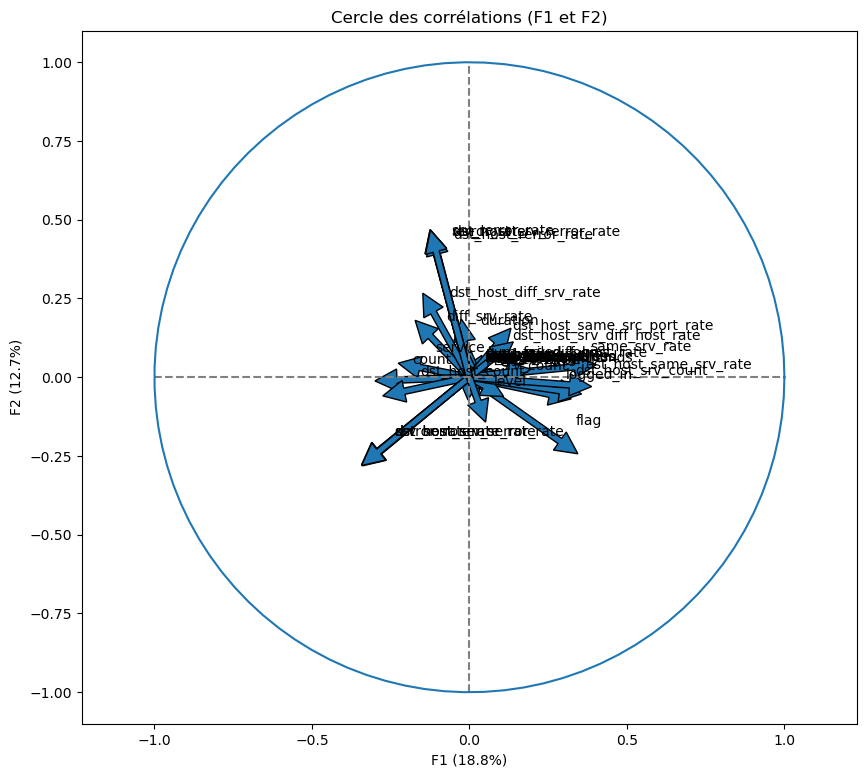

In [39]:
x_y = (0,1)
correlation_graph(acp, x_y, features)

In [42]:
data.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
duration,1.000000,0.038241,0.092857,-0.063389,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,...,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,0.134590,-0.156310
protocol_type,0.038241,1.000000,0.029993,0.093669,-0.000974,-0.000608,-0.001757,0.169534,-0.000965,-0.011857,...,0.001701,0.131380,-0.209105,-0.356183,-0.079399,-0.077926,-0.015435,-0.046938,0.135203,0.082775
service,0.092857,0.029993,1.000000,-0.304011,-0.001631,0.003596,-0.009952,0.084404,0.010980,-0.064067,...,-0.452702,0.284071,-0.111163,-0.156213,0.281632,0.277592,0.150666,0.148403,-0.001797,0.033725
flag,-0.063389,0.093669,-0.304011,1.000000,-0.008114,-0.004096,-0.010373,0.067215,0.005811,0.068438,...,0.630126,-0.283606,0.195689,0.073775,-0.443438,-0.443223,-0.683310,-0.718778,0.170749,0.054177
src_bytes,0.070737,-0.000974,-0.001631,-0.008114,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,...,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.011617,-0.022592
dst_bytes,0.034878,-0.000608,0.003596,-0.004096,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,...,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.007600,-0.018076
land,-0.001553,-0.001757,-0.009952,-0.010373,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,...,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.017239,-0.037038
wrong_fragment,-0.009866,0.169534,0.084404,0.067215,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,...,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,0.304125,-0.157130
urgent,0.003830,-0.000965,0.010980,0.005811,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,...,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.003513,-0.016411
hot,0.000705,-0.011857,-0.064067,0.068438,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,...,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,0.098611,-0.160013
